##### Problem statement.

Build a recommender system by using cosine simillarties score.

##### Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

import warnings
warnings.filterwarnings('ignore')

##### Redding the dataset

In [2]:
df = pd.read_csv('book.csv', encoding='latin1')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


##### Renaming the columns

In [3]:
df = df.rename({'User.ID':'user_id', 'Book.Title':'book_title', 'Book.Rating':'book_rating'}, axis = 1)
df.head()

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


##### Print the concise summary of the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   user_id      10000 non-null  int64 
 2   book_title   10000 non-null  object
 3   book_rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


##### Checking the shape of dataset

In [5]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)

Tota Rows and Columns (Rows,Columns) :  (10000, 4)


In [6]:
df.describe()

,Unnamed: 0,user_id,book_rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


##### since the dataset contain null values also count total rows in each column which contain null values

In [7]:
df.isna().sum()

Unnamed: 0     0
user_id        0
book_title     0
book_rating    0
dtype: int64

##### duplicated()' function in pandas return the duplicate row as True and othter as False
##### for counting the duplicate elements we sum all the rows

In [8]:
sum(df.duplicated())

0

In [9]:
len(df)

10000

##### Number of unique users and books in the dataset

In [10]:
print('Number of Unique USER ID is : ',len(df.user_id.unique()))
print('Number of Unique BOOK TITLE is : ',len(df.book_title.unique()))

Number of Unique USER ID is :  2182
Number of Unique BOOK TITLE is :  9659


In [11]:
print(df.user_id.nunique(), df.book_title.nunique())

2182 9659


In [12]:
df.book_title.unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [13]:
df.book_rating.unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

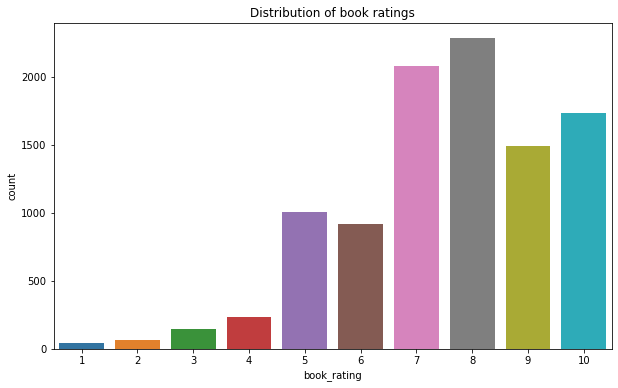

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='book_rating', data=df)
ax.set_title('Distribution of book ratings')

plt.show()

In [15]:
df.columns

Index(['Unnamed: 0', 'user_id', 'book_title', 'book_rating'], dtype='object')

##### Making transpose of the dataframe and making the title of the book as column names

In [16]:
book = df.pivot_table(index='user_id',
                                 columns='book_title',
                                 values='book_rating').reset_index(drop=True)
book.head()

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
book.shape

(2182, 9659)

##### Imputing the NaN's in the dataframe with 0

In [18]:
book.fillna(0, inplace = True)
book

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
c = df['book_rating'].mean()
c

7.5663

In [20]:
m = df['book_rating'].quantile(0.90)
m

10.0

##### Creating a list of book category which has a book rating greater than 90% quantile

In [21]:
Books = df.copy().loc[df['book_rating'] >= m]
Books.shape

(1732, 4)

##### Using cosine function to find the mmore similar books based on the lower cosine angle between the vectors¶

In [22]:
cos = 1 - pairwise_distances(book.values, metric = 'cosine')
cos.shape

(2182, 2182)

In [23]:
cos

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
cos[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [25]:
cos_df = pd.DataFrame(cos)
cos_df.index = df.user_id.unique()
cos_df.columns = df.user_id.unique()

In [26]:
cos_df.shape

(2182, 2182)

In [27]:
cos_df.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
np.fill_diagonal(cos, 0)
cos_df.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Most Similar Users

In [29]:
cos_df.idxmax(axis = 1)[20:30]

276798    276726
276800    276726
276804    276726
276808    276726
276811    276726
276812    277533
276813      3546
276814    277828
276820      3462
276822    276726
dtype: int64

In [30]:
user = df[(df['user_id'] == 276726) | (df['user_id'] == 17)]
user

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
2413,2414,17,Conversations With Dogbert: A Dilbert Book,7
2414,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,2416,17,You Don't Need Experience if You've Got Attitude,6
2416,2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [31]:
user1 = df[(df['user_id'] == 276726)] 
user1

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5


In [32]:
user2 = df[(df['user_id'] == 17)] 
user2

,Unnamed: 0,user_id,book_title,book_rating
2413,2414,17,Conversations With Dogbert: A Dilbert Book,7
2414,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,2416,17,You Don't Need Experience if You've Got Attitude,6
2416,2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [33]:
indices = pd.Series(df.index, index = df['book_title']).drop_duplicates()
indices[:10]

book_title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories              

##### Merging the user 1 and user 2 based on the book rating they have given

In [34]:
pd.merge(user1, user2, on = 'book_rating', how = 'outer')

,Unnamed: 0_x,user_id_x,book_title_x,book_rating,Unnamed: 0_y,user_id_y,book_title_y
0,1.0,276726.0,Classical Mythology,5,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...
1,NaN,NaN,NaN,7,2414,17,Conversations With Dogbert: A Dilbert Book
2,NaN,NaN,NaN,6,2416,17,You Don't Need Experience if You've Got Attitude
3,NaN,NaN,NaN,3,2417,17,"The Boss: Nameless, Blameless and Shameless (A..."


In [35]:
book_user_rating = book["You Don't Need Experience if You've Got Attitude"] 
book_user_rating

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2177    0.0
2178    0.0
2179    0.0
2180    0.0
2181    0.0
Name: You Don't Need Experience if You've Got Attitude, Length: 2182, dtype: float64

##### Finding the correlation with different book

In [36]:
similar_to_book = book.corrwith(book_user_rating)

In [37]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
book_title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


##### Viewing the books based on the highly correlated books in descending order.

In [38]:
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
book_title,
Conversations With Dogbert: A Dilbert Book,1.0
"The Boss: Nameless, Blameless and Shameless (Adams, Scott, Dilbert Book,)",1.0
The Dilbert Bunch: A Dilbert Book (Main Street Editions),1.0
You Don't Need Experience if You've Got Attitude,1.0


In [39]:
ratings_mean_count = pd.DataFrame(df.groupby('book_title')['book_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('book_title')['book_rating'].count())

<AxesSubplot:>

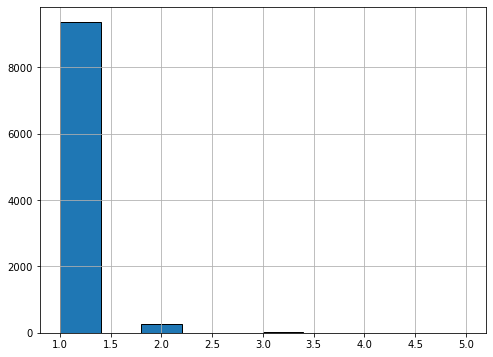

In [40]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=10)

<AxesSubplot:>

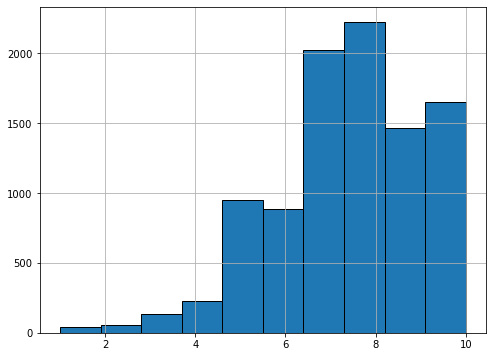

In [41]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['book_rating'].hist(bins=10)

##### Conclusion

- Since books with higher correlation are not very well known, we can say that correlation is not a good factor to consider while recommending books to the users.